In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
data = sns.load_dataset('iris')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


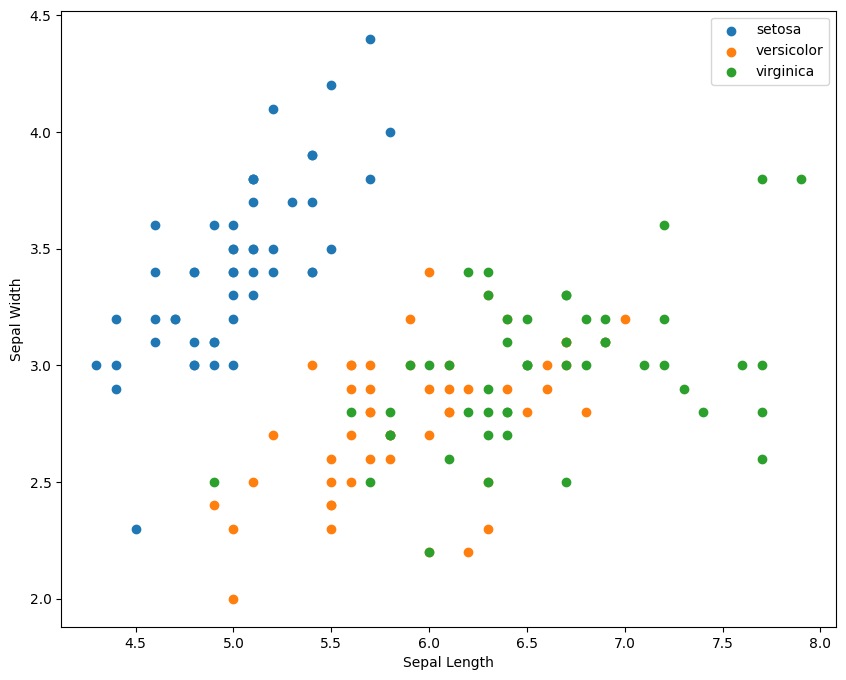

In [4]:
plt.figure(figsize=(10,8))
for species,species_data in data.groupby('species'):
     plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label=species)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

In [5]:
X = data.drop('species', axis =1)
Y = data['species']

In [6]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.15, random_state=2)

In [7]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
94,5.6,2.7,4.2,1.3
87,6.3,2.3,4.4,1.3
29,4.7,3.2,1.6,0.2
2,4.7,3.2,1.3,0.2
127,6.1,3.0,4.9,1.8
...,...,...,...,...
75,6.6,3.0,4.4,1.4
43,5.0,3.5,1.6,0.6
22,4.6,3.6,1.0,0.2
72,6.3,2.5,4.9,1.5


In [8]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [9]:
import pydotplus

In [10]:
Y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
# Visualize the decision tree
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=X.columns,
    class_names=Y.unique(),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("iris_decision_tree.png")

InvocationException: GraphViz's executables not found

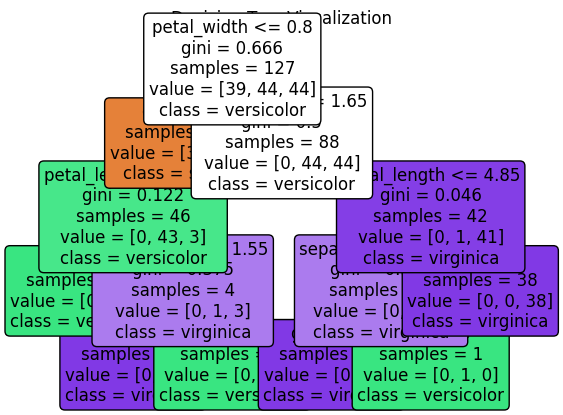

In [12]:
plot_tree(model, 
         feature_names=X.columns,  # or your feature names
         class_names=Y.unique(),     # or your class names
         filled=True,
         rounded=True,
         fontsize=12)
plt.title("Decision Tree Visualization")
plt.savefig("iris_decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()